In [31]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
data = pd.read_csv(f"C:\ProgramData\Ml_Data\income.csv")

In [33]:
data.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


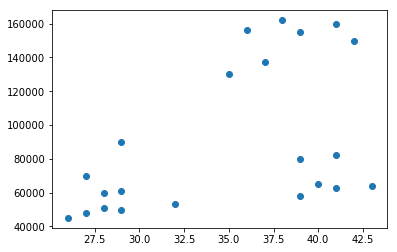

In [34]:
plt.scatter(data.Age,data['Income($)'])

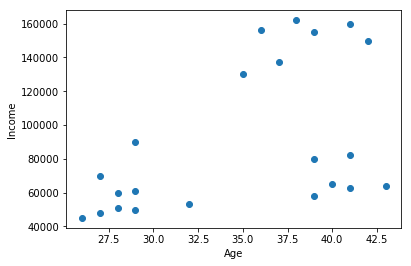

In [35]:
plt.scatter(data.Age,data['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income')

In [36]:
km = KMeans(n_clusters=3)

In [37]:
y_pred = km.fit_predict(data[['Age','Income($)']])

In [38]:
y_pred

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [39]:
data['cluster'] = y_pred
data.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


In [40]:
km.cluster_centers_

array([[  3.40000000e+01,   8.05000000e+04],
       [  3.82857143e+01,   1.50000000e+05],
       [  3.29090909e+01,   5.61363636e+04]])

In [41]:
data1 = data[data.cluster==0]
data2 = data[data.cluster==1]
data3 = data[data.cluster==2]

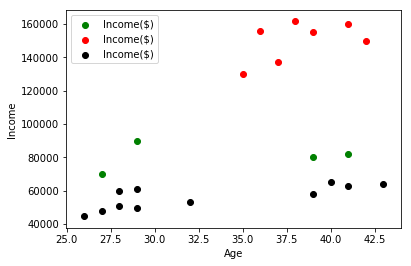

In [42]:
plt.scatter(data1.Age,data1['Income($)'],color='green')
plt.scatter(data2.Age,data2['Income($)'],color='red')
plt.scatter(data3.Age,data3['Income($)'],color='black')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

In [43]:
scaler = MinMaxScaler()
scaler.fit(data[['Income($)']])
data['Income($)'] = scaler.transform(data[['Income($)']])
scaler.fit(data[['Age']])
data['Age'] = scaler.transform(data[['Age']])
data.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


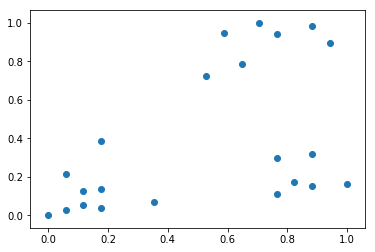

In [44]:
plt.scatter(data.Age,data['Income($)'])

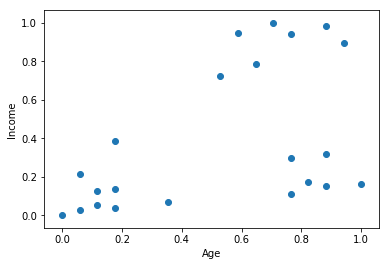

In [45]:
plt.scatter(data.Age,data['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income')

In [46]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(data[['Age','Income($)']])
y_pred

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [47]:
data['cluster'] = y_pred
data.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [48]:
km.cluster_centers_

array([[ 0.1372549 ,  0.11633428],
       [ 0.72268908,  0.8974359 ],
       [ 0.85294118,  0.2022792 ]])

In [49]:
data1 = data[data.cluster==0]
data2 = data[data.cluster==1]
data3 = data[data.cluster==2]

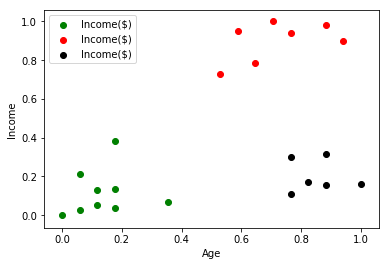

In [50]:
plt.scatter(data1.Age,data1['Income($)'],color='green')
plt.scatter(data2.Age,data2['Income($)'],color='red')
plt.scatter(data3.Age,data3['Income($)'],color='black')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

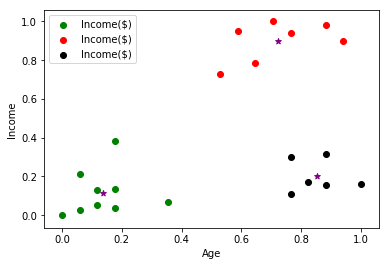

In [52]:
plt.scatter(data1.Age,data1['Income($)'],color='green')
plt.scatter(data2.Age,data2['Income($)'],color='red')
plt.scatter(data3.Age,data3['Income($)'],color='black')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

# Elbo plot

In [55]:
sse = []

k_rng = range(1,10)

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(data[['Age','Income($)']])
    sse.append(km.inertia_)

In [56]:
sse

[5.4340115119881789,
 2.0911363886990779,
 0.4750783498553095,
 0.34910470944195648,
 0.26217927623452131,
 0.22020960864009395,
 0.16858512236029757,
 0.13265419827245162,
 0.10188787724979426]

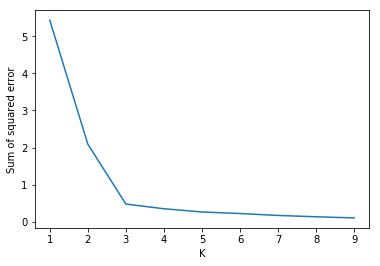

In [57]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)